<a href="https://colab.research.google.com/github/AlenZhang-Dev/Learning-Records/blob/master/Machine%20Learning/Deep%20Learning%20with%20Python/5.3%20%E5%B0%8F%E5%9E%8B%E6%95%B0%E6%8D%AE%E9%9B%86%E4%B8%8A%E8%AE%AD%E7%BB%83%E5%8D%B7%E7%A7%AF%E7%A5%9E%E7%BB%8F%E7%BD%91%E7%BB%9C%E3%80%90%E7%8C%AB%E7%8B%97%E5%88%86%E7%B1%BB%E3%80%91.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 在小型数据集上从头开始训练一个卷积神经网络
使用很少的数据来训练一个图像分类模型，是很常见的的情况。如何在一个很小的样本上进行图像分类可能会是学习过程中常见会碰到的问题。5.1-5.3会逐步介绍提高网络精度的方法。
例子用到的数据集不包含在Keras中。由Kaggle在2013年未公开并作为一项计算机视觉竞赛的一部分，名为dogs-vs-cats。
本例的目的是：使用不到参赛选手10%的数据集上训练模型，训练得到的结果和参赛选手得到的结果相近。
该数据集包含25000张猫狗图像（每个类别12500张）。我们需要创建一个新的数据集，每个类别各1000个样本的数据集，每个类别各500个样本的验证集和每个类别各500个样本的测试集。

2013年猫狗分类在Kaggle竞赛的优胜者使用的是卷积神经网络。最佳结果达到来95%的精度。

## 访问数据集并创建新的数据集

Keras并没有包含猫狗分离的数据集，从[Kaggle链接](https://www.kaggle.com/c/dogs-vs-cats/data )下载原始数据集。该数据集包含了25000张猫狗图像，下载数据集并解压之后，需要创建一个新的数据集，其中包含三个子集：每个类别各1000个样本的训练集，每个类别各500个样本的验证集以及每个类别各500样本的测试集。

将数据集从Kaggle上传到Google Drive上，直接通过Colab访问Google Drive中的数据。

In [1]:
# mount the drive to colab notebook
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


将图像复制到训练、验证和测试的目录。

如果指定路径中不存在相关数据，执行如下代码。

In [ ]:
import os, shutil

# The path to the directory where the original dataset was uncompressed.
original_dataset_dir = '/content/gdrive/My Drive/Kaggle/dogs-vs-cats/train'

base_dir = '/content/gdrive/My Drive/Kaggle/dogs-vs-cats/dogs-vs-cats-small'
os.mkdir(base_dir)

train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

# Directory with our validation cat pictures
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

# Directory with our validation dog pictures
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

# Copy first 1000 cat images to train_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

# Copy next 500 cat images to validation_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 cat images to test_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy first 1000 dog images to train_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 dog images to validation_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 dog images to test_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

如果数据集已经存在，执行以下code，指定后续需要访问的目录。

In [2]:
import os, shutil

# The path to the directory where the original dataset was uncompressed.
original_dataset_dir = '/content/gdrive/My Drive/Kaggle/dogs-vs-cats/train'

base_dir = '/content/gdrive/My Drive/Kaggle/dogs-vs-cats/dogs-vs-cats-small'

train_dir = os.path.join(base_dir, 'train')

validation_dir = os.path.join(base_dir, 'validation')

test_dir = os.path.join(base_dir, 'test')

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

# Directory with our test cat pictures
test_cats_dir = os.path.join(test_dir, 'cats')

# Directory with our test dog pictures
test_dogs_dir = os.path.join(test_dir, 'dogs')

检查图像每个分组的图像是否正确。2000张训练图像，1000张验证图像以及1000张测试图像。

In [3]:
print('total training cat images:', len(os.listdir(train_cats_dir)))

print('total training dog images:', len(os.listdir(train_dogs_dir)))

print('total validation cat images:', len(os.listdir(validation_cats_dir)))

print('total validation dog images:', len(os.listdir(validation_dogs_dir)))

print('total test cat images:', len(os.listdir(test_cats_dir)))

print('total test dog images:', len(os.listdir(test_dogs_dir)))


total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
total test cat images: 500
total test dog images: 500


## 构建网络（Build our network）


根据5.1的知识，卷积网络有Conv2D层和MaxPooling2D层交替堆叠构成。而当需要解决更复杂的问题时，需要相应增大网络，即在增加一个Conv2D+MaxPooling2D的组合。一方面可以增大网络，也可以进一步减少特征图的尺寸，使其在连接Flatten层之前尺寸不会太大。因为面对的是一个二分类问题，所以最后一层使用sigmoid激活的单一单元（大小为1的Dense层）这个单元将对某个类别的概率进行编码。

In [4]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

配置模型用于训练，使用RMSprop优化器，因为网络最后一层是单一sigmoid单元，所以比较适合使用二元交叉熵作为损失函数。

In [6]:
# training
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

## 数据预处理

将数据进行格式化后进过预处理的浮点数张量。
*   读取图像文件
*   将JPEG文件解码为RGB像素网格
*   这些像素点网格转换为浮点数张量
*   将像素值[0,255]缩放为[0,1]之间

以上过程使用keras.preprocessing.image可以很好的完成。使用keras.preprocessing.image模块，可以快速创建Python生成器，能够将硬盘中图像文件自动转换为预处理好的张量批量。



In [7]:
from keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


查看其中一个生成器的输出：它生成了150 * 150的RGB图像【形状为（20，150，150，3）】与二进制标签【形状为（20，）】组成的批量。每个批量包含20个样本（批量大小）。生成器会不断生成这些批量，因此需要在某个时刻终止（break）。

In [8]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


我们可以利用生成器（train_generator），对模型数据进行拟合。第一个参数为Python生成器，可不停生成输入和目标组成的批量。

在使用fit_generator时，可以传入一个validtion_data参数，作用和在fit方法中类似。这个参数可以是一个数据生成器，也可以是Numpy数组组成的元组。如果向validation_data传入一个生成器，那么这个生成器可以不停生成验证数据批量，因此你需要制定validation_steps参数，说明需要从验证生成器中抽取多少批次用于评估。

因为数据是不断生成的，所以Keras模型需要知道每一轮需要从生成器汇总抽取多少样本，该参数由steps_per_epoch控制的，执行了steps_per_epoch次梯度下降后，进行下一轮次。
Explain：train_generator每个批量生成20个样本，2000个样本需要100次批量生成。model.fit_generator中step_per_epoch【每一次拟合需要取数据的step】为100，即一共取100次才能取完一遍2000个数据集。
validation_steps参数表明需要从验证生成器中抽取多少批次用于评估。

In [9]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/30
100/100 [==============================] - 596s 6s/step - loss: 0.6899 - acc: 0.5160 - val_loss: 0.6765 - val_acc: 0.5710
Epoch 2/30
100/100 [==============================] - 13s 126ms/step - loss: 0.6574 - acc: 0.6205 - val_loss: 0.6383 - val_acc: 0.6320
Epoch 3/30
100/100 [==============================] - 12s 125ms/step - loss: 0.6050 - acc: 0.6765 - val_loss: 0.6103 - val_acc: 0.6490
Epoch 4/30
100/100 [==============================] - 13s 127ms/step - loss: 0.5683 - acc: 0.7070 - val_loss: 0.5997 - val_acc: 0.6720
Epoch 5/30
100/100 [==============================] - 12s 125ms/step - loss: 0.5440 - acc: 0.7210 - val_loss: 0.5930 - val_acc: 0.6640
Epoch 6/30
100/100 [==============================] - 13s 125ms/step - loss: 0.5116 - acc: 0.7480 - val_loss: 0.5770 - val_acc: 0.6910
Epoch 7/30
100/100 [==============================] - 13s 125ms/step - loss: 0.4865 - acc: 0.7720 - val_loss: 0.5561

In [ ]:
model.save('cats_and_dogs_small_1.h5')

## 数据可视化


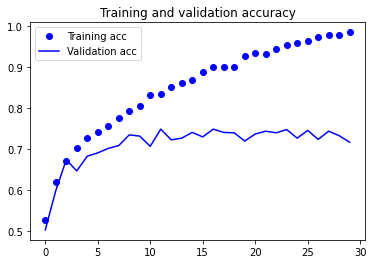

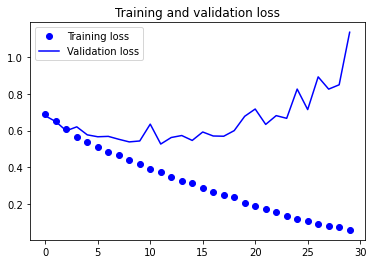

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

从训练可视化可以看出，训练精度逐渐增加，接近100%，而验证精度在后期并没有明显的提升。过拟合的痕迹非常明显。以下通过使用数据增强和dropout形式降低过拟合。

总结：根据图像可以明显看出过拟合的痕迹，最终验证精度停留在70%左右，并没有随着训练次数的增加而好转。因此通过以下方法避免过拟合。

# 使用数据增强
学习样本太少所以导致过拟合。数据增强可以从现有训练样本中生成更多数据，利用多种可能生成可信图像的随机变换来增加样本。其目标是让模型在训练过程中不会两次查看完全相同的图像，让模型能够观察到更多的内容。

以下为对数据增强的举例，从数据集中随机选取一张图进行增强并显示。

ImageDataGenerator中的具体参数使用请查阅Keras文档。

In [10]:
datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

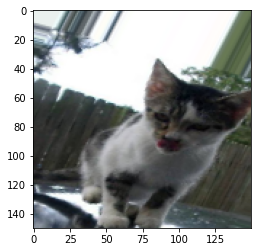

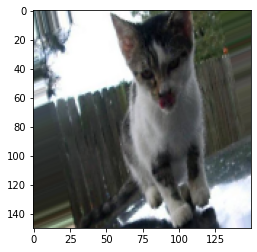

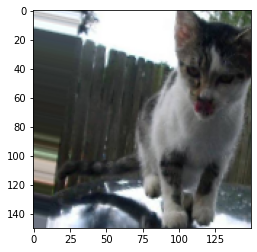

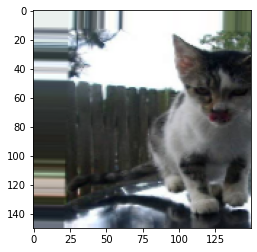

In [11]:
# This is module with image preprocessing utilities
from keras.preprocessing import image
import matplotlib.pyplot as plt

fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]

# We pick one image to "augment"
img_path = fnames[3]

# Read the image and resize it
img = image.load_img(img_path, target_size=(150, 150))

# Convert it to a Numpy array with shape (150, 150, 3)
x = image.img_to_array(img)

# Reshape it to (1, 150, 150, 3)
x = x.reshape((1,) + x.shape)

# The .flow() command below generates batches of randomly transformed images.
# It will loop indefinitely, so we need to `break` the loop at some point!
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()

通过数据增强来训练一个新网络，网络不会两次看到相同的输入，但看到的信息依旧是高度相关的，因为这些输入都是来自少量的图像。无法生成新信息。因此不足以完全消除过拟合，进一步降低过拟合，我们会下向模型中加入dropout层，添加在密集连接层之前。

## 建立包含Dropout的模型
将Dropout层添加到密集连接层前。用于随机丢弃一些样本图像，减少过拟合的风险。定义一个包含dropout层的卷积神经网络。

In [12]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [13]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 22s 218ms/step - loss: 0.6936 - acc: 0.5010 - val_loss: 0.6862 - val_acc: 0.5850
Epoch 2/100
100/100 [==============================] - 21s 211ms/step - loss: 0.6836 - acc: 0.5500 - val_loss: 0.6691 - val_acc: 0.5920
Epoch 3/100
100/100 [==============================] - 21s 211ms/step - loss: 0.6719 - acc: 0.5885 - val_loss: 0.6472 - val_acc: 0.6190
Epoch 4/100
100/100 [==============================] - 21s 209ms/step - loss: 0.6587 - acc: 0.6140 - val_loss: 0.6543 - val_acc: 0.6210
Epoch 5/100
100/100 [==============================] - 21s 205ms/step - loss: 0.6468 - acc: 0.6300 - val_loss: 0.6903 - val_acc: 0.5700
Epoch 6/100
100/100 [==============================] - 20s 205ms/step - loss: 0.6319 - acc: 0.6395 - val_loss: 0.6160 - val_acc: 0.6480
Epoch 7/100
100/100 [==============================] - 20s 204ms/step - loss: 0.6247 - acc: 0.6535 -

## 保存模型并数据可视化

In [14]:
model.save('cats_and_dogs_small_2.h5')

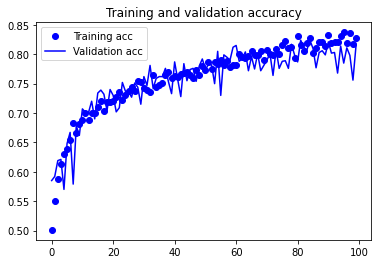

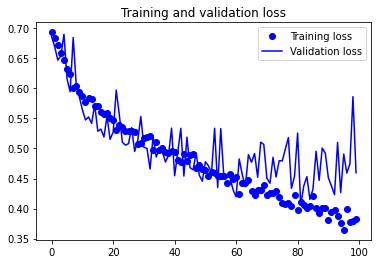

In [15]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

总结：通过正则化方法和调节网络参数后，可以得到85%左右的精度，但在没有外界帮助下需要再提高网络的精度会变得很困难，因为可用的数据太少。5.3引入预训练的卷积神经网络进行训练模型，以进一步提升网络精度。